# 04 — Clustering (PyCaret)
**Dataset:** Iris (numeric features)  
**Note:** Clustering module has no `use_gpu` flag.

In [1]:
# Install latest stable PyCaret 3.x and common GPU-capable libs
!pip -q install --upgrade pycaret xgboost catboost lightgbm plotly gradio

import sys, sklearn, pycaret, platform
print("Python:", sys.version)
print("Platform:", platform.platform())
print("scikit-learn:", sklearn.__version__)
print("pycaret:", pycaret.__version__)

# Check GPU
try:
    import subprocess, shutil
    if shutil.which("nvidia-smi"):
        print("\nGPU detected:")
        print(subprocess.check_output(["nvidia-smi"], text=True))
    else:
        print("\nNo NVIDIA GPU detected in this runtime. (Colab: Runtime -> Change runtime type -> GPU)")
except Exception as e:
    print("GPU check error:", e)

zsh:1: command not found: pip
Python: 3.11.11 (main, Feb  5 2025, 19:11:07) [Clang 19.1.6 ]
Platform: Linux-6.6.87.2-microsoft-standard-WSL2-x86_64-with-glibc2.35
scikit-learn: 1.4.2
pycaret: 3.3.2

GPU detected:
Sun Nov  2 16:17:59 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 580.65.05              Driver Version: 580.88         CUDA Version: 13.0     |
+-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3060 Ti     On  |   00000000:01:00.0  On |                  N/A |
|  0%   41C    P8  

In [2]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
X = df.drop(columns=['species'])

In [3]:
print("Shape:", df.shape)
display(df.head())
display(df.describe(include='all').T.head(20))
print("\nNA counts:")
print(df.isna().sum())

Shape: (150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
sepal_length,150.0,NaN,NaN,NaN,5.843333,0.828066,4.3,5.1,5.8,6.4,7.9
sepal_width,150.0,NaN,NaN,NaN,3.057333,0.435866,2.0,2.8,3.0,3.3,4.4
petal_length,150.0,NaN,NaN,NaN,3.758,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,NaN,NaN,NaN,1.199333,0.762238,0.1,0.3,1.3,1.8,2.5
species,150,3,setosa,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN



NA counts:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


,Description,Value
0,Session id,42
1,Original data shape,"(150, 4)"
2,Transformed data shape,"(150, 4)"
3,Numeric features,4
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Normalize,True
9,Normalize method,zscore


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4799,157.3602,0.7894,0,0,0


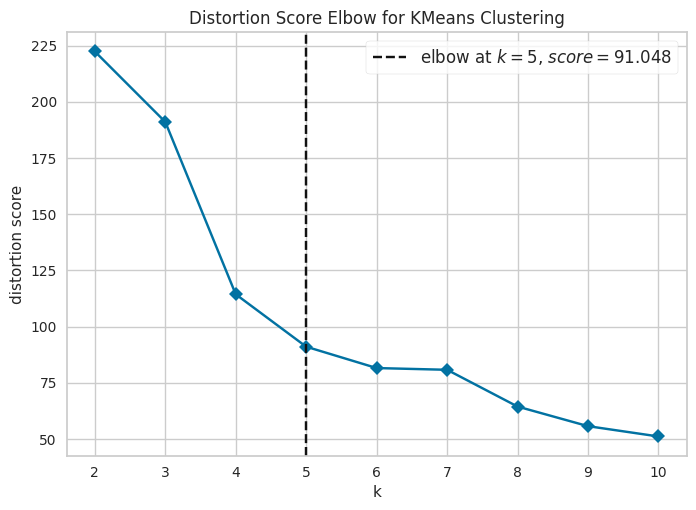

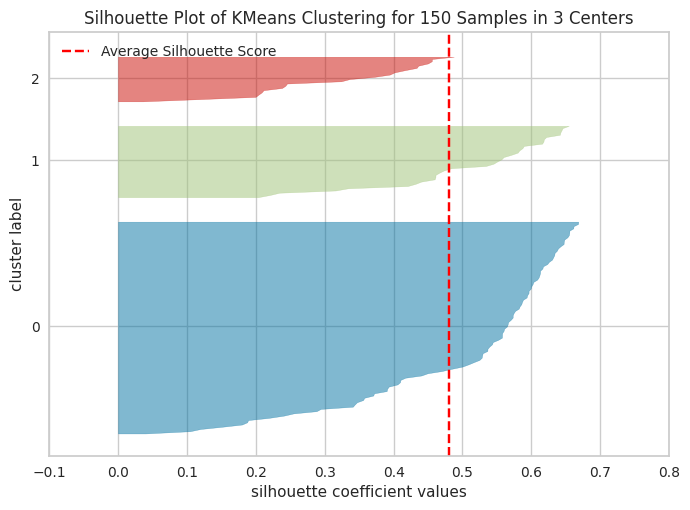

,sepal_length,sepal_width,petal_length,petal_width,Cluster
0,5.1,3.5,1.4,0.2,Cluster 1
1,4.9,3.0,1.4,0.2,Cluster 2
2,4.7,3.2,1.3,0.2,Cluster 2
3,4.6,3.1,1.5,0.2,Cluster 2
4,5.0,3.6,1.4,0.2,Cluster 1


In [6]:
from pycaret.clustering import *
s = setup(X, session_id=42, normalize=True)
kmeans = create_model('kmeans', num_clusters=3)
plot_model(kmeans, plot='elbow')
plot_model(kmeans, plot='silhouette')
assign_df = assign_model(kmeans)
display(assign_df.head())
# save_path = save_model(kmeans, f"{ART_DIR}/clustering_iris_kmeans")
# print("Saved:", save_path)